# Youtube-DL and LibROSA

## Scraping YouTube for .mp3 files

youtube-dl is a Python library for downloading videos from YouTube. https://github.com/ytdl-org/youtube-dl/blob/master/README.md#readme

Install with pip:
pip install --upgrade youtube-dl

The nice thing about youtube-dl is that it has a built-in encoder to extract the audio from the mp4 and save it as an mp3. The code below demonstrates:

In [2]:
from __future__ import unicode_literals
import youtube_dl


ydl_opts = {
    'format': 'bestaudio/best',  # postprocessors convert mp4 to mp3. mp4 file is deleted upon completion
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'mp3',
        'preferredquality': '192',
    }],
}
with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    ydl.download(['https://www.youtube.com/watch?v=dQw4w9WgXcQ'])  # replace url with your favorite video to grab audio
    ydl.download(['https://www.youtube.com/watch?v=hEMm7gxBYSc'])  # note that this will save in the same directory this code is run from
    ydl.download(['https://www.youtube.com/watch?v=2MkfTYPmLlA'])
    ydl.download(['https://www.youtube.com/watch?v=AZKcl4-tcuo'])

[youtube] dQw4w9WgXcQ: Downloading webpage
[download] Destination: Rick Astley - Never Gonna Give You Up (Video)-dQw4w9WgXcQ.webm
[download] 100% of 3.28MiB in 00:00                   
[ffmpeg] Destination: Rick Astley - Never Gonna Give You Up (Video)-dQw4w9WgXcQ.mp3
Deleting original file Rick Astley - Never Gonna Give You Up (Video)-dQw4w9WgXcQ.webm (pass -k to keep)
[youtube] hEMm7gxBYSc: Downloading webpage
[download] Destination: Nirvana - Where Did You Sleep Last Night (Live On MTV Unplugged Unedited)-hEMm7gxBYSc.webm
[download] 100% of 6.35MiB in 00:01                  
[ffmpeg] Destination: Nirvana - Where Did You Sleep Last Night (Live On MTV Unplugged Unedited)-hEMm7gxBYSc.mp3
Deleting original file Nirvana - Where Did You Sleep Last Night (Live On MTV Unplugged Unedited)-hEMm7gxBYSc.webm (pass -k to keep)
[youtube] 2MkfTYPmLlA: Downloading webpage
[download] Destination: Lead Belly 'In the Pines'-2MkfTYPmLlA.webm
[download] 100% of 2.92MiB in 00:02                  
[ffmpeg

## Extracting Audio from .mp3 with LibROSA

The next section demonstrates the extraction of audio from .mp3 files using LibROSA. This example is taken from: https://nbviewer.jupyter.org/github/mdeff/fma/blob/outputs/usage.ipynb Note that I made some modifications to the notebook listed in the link, as LibROSA has changed since the notebook's initial publication. 

Ensure that you have the installs listed below:

In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import sklearn
import librosa
import librosa.display
#import utils

plt.rcParams['figure.figsize'] = (17,5)

Load your favorite .mp3 file.

In [2]:
audio_dir = os.getcwd()  # audio directory where mp3s are stored. 
print(audio_dir)

D:\Analytics


In [3]:
# let's try playing Never Gonna Give You Up
files = [file for file in os.listdir(audio_dir) if '.mp3' in file]
print(files)

['David Bowie – Life On Mars (Official Video)-AZKcl4-tcuo.mp3', "Lead Belly 'In the Pines'-2MkfTYPmLlA.mp3", 'Nirvana - Where Did You Sleep Last Night (Live On MTV Unplugged Unedited)-hEMm7gxBYSc.mp3', 'Rick Astley - Never Gonna Give You Up (Video)-dQw4w9WgXcQ.mp3']


In the following, we will load the audio file selected from above into librosa, and save the amplitude data and sampling rate to x and sr. We force mono to cut down on the total size of the data. After this point, we can freely operate on x as a numpy array.

Duration: 212.04s, 10178143 samples


(-1.0, 1.0)

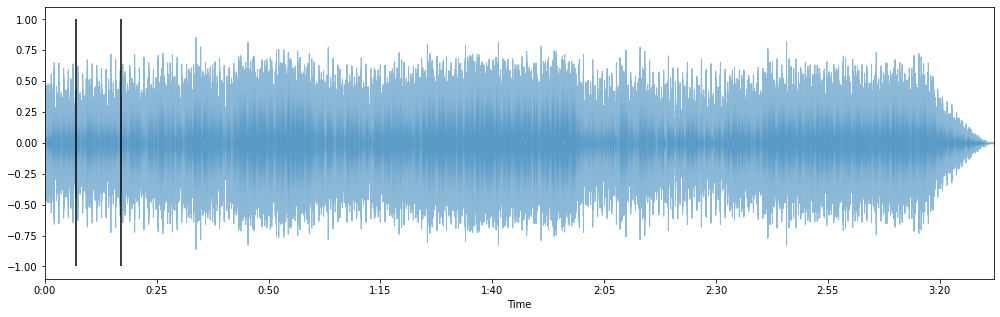

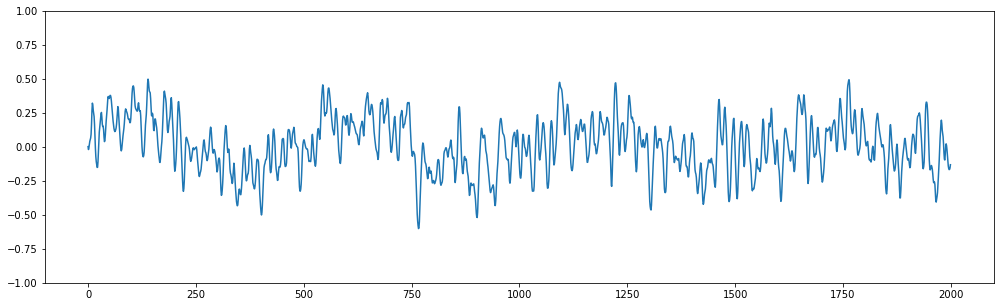

In [4]:
rickroll = files[-1]
x, sr = librosa.load(rickroll, sr=None, mono=True)  # forcing stereo to mono cuts down on the total amount of data processing req.
print('Duration: {:.2f}s, {} samples'.format(x.shape[-1] / sr, x.size))
start, end = 7, 17
librosa.display.waveplot(x, sr, alpha=0.5)  # librosa's display waveplot is a bit better for visualizing audio data than matplotlib
plt.vlines([start, end], -1, 1)

start = len(x)//2
plt.figure()
plt.plot(x[start:start+2000])
plt.ylim((-1,1))

Below we demonstrate creating a spectrogram from the audio data. See https://librosa.github.io/librosa/generated/librosa.core.stft.html for more details.

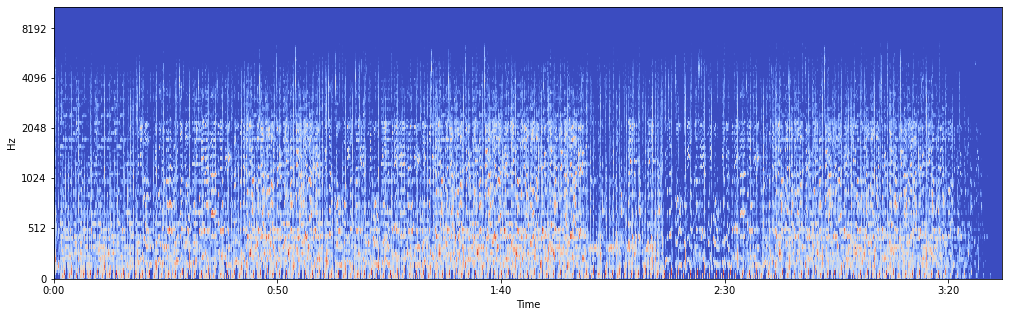

In [5]:
# now to create a spectrogram
stft = np.abs(librosa.stft(x, n_fft=2048, hop_length=512))  # short-time fft
mel = librosa.feature.melspectrogram(sr=sr, S=stft**2)
log_mel = librosa.amplitude_to_db(mel)

librosa.display.specshow(log_mel, sr=sr, hop_length=512, x_axis='time', y_axis='mel')

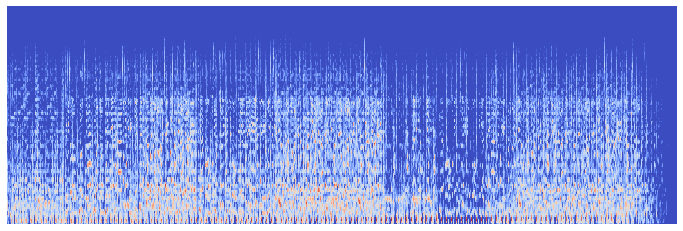

In [14]:
plt.figure(figsize=(12,4))
ax = plt.axes()
ax.set_axis_off()
plt.set_cmap('hot')
librosa.display.specshow(log_mel, sr=sr, hop_length = 512, x_axis='time', y_axis='mel')
plt.savefig('testfig.png', bbox_inches='tight', transparent=True, pad_inches=0.0)
plt.show()

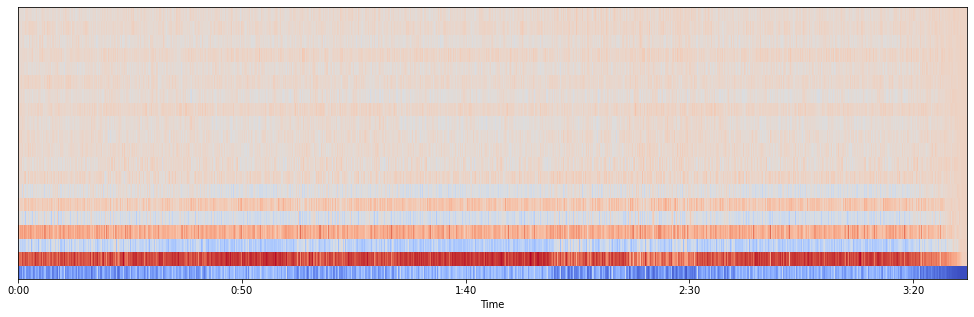

In [7]:
mfcc = librosa.feature.mfcc(S=librosa.power_to_db(mel), n_mfcc=20)
mfcc = sklearn.preprocessing.StandardScaler().fit_transform(mfcc)
librosa.display.specshow(mfcc, sr=sr, x_axis='time')